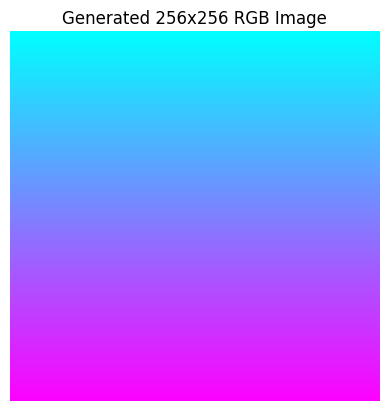

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Image dimensions
height, width = 256, 256

# Create empty image
image = np.zeros((height, width, 3))

# Fill pixel values according to the rule
for i in range(height):
    r_val = i * 0.0039
    g_val = 1 - i * 0.0039
    b_val = 1.0

    image[i, :, 0] = r_val  # Red channel
    image[i, :, 1] = g_val  # Green channel
    image[i, :, 2] = b_val  # Blue channel

# Display the image
plt.imshow(image)
plt.title("Generated 256x256 RGB Image")
plt.axis('off')
plt.show()


In [ ]:
from warping import *
import matplotlib.pyplot as plt
from PIL import Image

# load square, grayscale image
im = Image.open('HanyFaridDistort.jpg').convert('L')  # Convert to grayscale
[ydim, xdim] = im.size
mid = round(max(xdim, ydim)/2)

# define sampling lattices
n = 100  # lattice sampling
dst = griddify(shape_to_rect(im.size), n, n)  # destination grid
src = dst.copy()  # source grid (initialize as copy of dst)

# define new sampling lattice (jrc)
k = 0.0000005  # estimated lens distortion coefficient
dst = dst - mid  # put image center at (0,0)

# YOUR CODE HERE - apply radial distortion to create src grid
r = np.sqrt(dst[:,:,0]**2 + dst[:,:,1]**2)  # distance from center
src = dst * (1 + k * r**2)[:,:,np.newaxis]  # apply radial distortion

dst = dst + mid  # re-center
dst = dst.astype(int)  # convert to integer
src = src + mid  # re-center
src = src.astype(int)  # convert to integer

# Warp the image using the calculated grids
warped_im = warp(im, src, dst)

# Display results
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title("Original")
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.title("Corrected")
plt.imshow(warped_im, cmap='gray')
plt.show()

In [ ]:
import numpy as np

def dct2_quantized(block, quant_matrix):
    """
    Perform 2D DCT on an 8x8 block and apply quantization.

    Parameters:
    block (np.ndarray): 8x8 numpy array of pixel values.
    quant_matrix (np.ndarray): 8x8 numpy array of quantization values.

    Returns:
    np.ndarray: Quantized 8x8 DCT coefficients.
    """
    assert block.shape == (8, 8), "Input block must be 8x8"
    assert quant_matrix.shape == (8, 8), "Quantization matrix must be 8x8"

    result = np.zeros((8, 8))
    alpha = lambda x: np.sqrt(1/8) if x == 0 else np.sqrt(2/8)

    for u in range(8):
        for v in range(8):
            sum_val = 0.0
            for x in range(8):
                for y in range(8):
                    sum_val += block[x, y] * \
                        np.cos((2 * x + 1) * u * np.pi / 16) * \
                        np.cos((2 * y + 1) * v * np.pi / 16)
            result[u, v] = alpha(u) * alpha(v) * sum_val

    # Quantize
    quantized_result = np.round(result / quant_matrix).astype(int)
    return quantized_result
